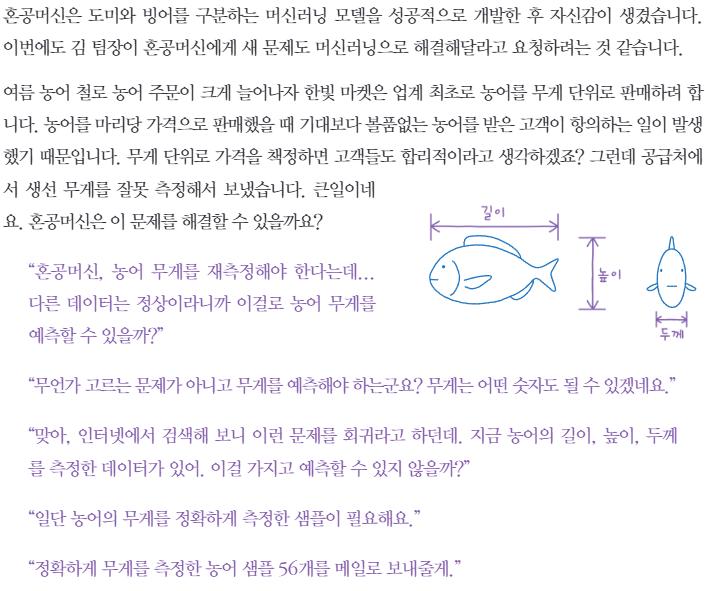

#K-최근접 이웃 회귀
- 분류와 같이 가장 가까운 샘플 k 개를 선택
- 회귀에서는 현재 선택한 샘플의 평균을 값으로 선택

In [2]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

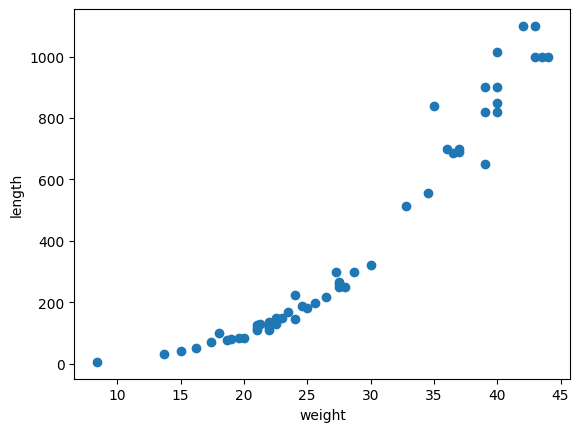

In [3]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('weight')
plt.ylabel('length')
plt.show()

In [5]:
# train set, test set 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

#사이킷런에 사용할 train set은 2차원 배열이어야함
# -1은 전체를 뜻함
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
# print(train_input.shape, test_input.shape)


(42, 1) (14, 1)


#KNeighborsRegressor 클래스

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))

0.992809406101064


##결정계수(R^2)
- 분류에서는 정확도 즉 정확하게 분류한 개수의 비율가지고 평가
- 회귀에서 정확한 숫자를 맞힌다는 것은 불가능, 예측하는 값이나 타깃 모두 임의의 수치이기 때문
- 그렇기 때문에 아래의 결정계수로 평가를 진행



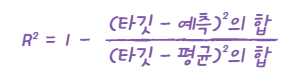

- 타깃이 평균을 예측하는 수준이면 최종 값이 0에 가까워짐
- 예측이 타깃에 아주 가까워지면 최종 값이 1에 가까운 값임

In [9]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

# test set에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)


19.157142857142862


#과대적합 or 과소적합
- train set은 점수가 좋은데 test set 점수가 낮으면 과대적합(overfitting)
- train set 보다 test set 점수가 낮거나 둘 다 낮으면 과소적합(underfitting)

In [10]:
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099254
0.992809406101064


- 과소적합을 해결하기 위해 모델의 복잡성을 올려야 한다.
- k-최근접 이웃 알고리즘은 k 갯수를 줄이면 모델이 복잡해진다.
- 이웃의 갯수를 줄이면 train set에 있는 국지적인 패턴에 민감해지고, 이웃 수를 늘리면 일반적인 패턴을 따른다.

In [15]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


#k값의 변화에 따른 훈련

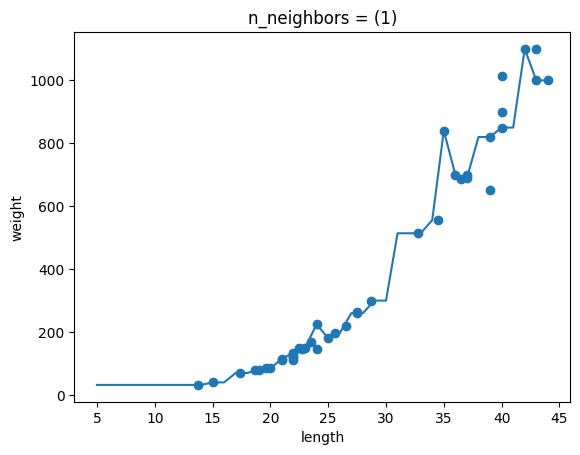

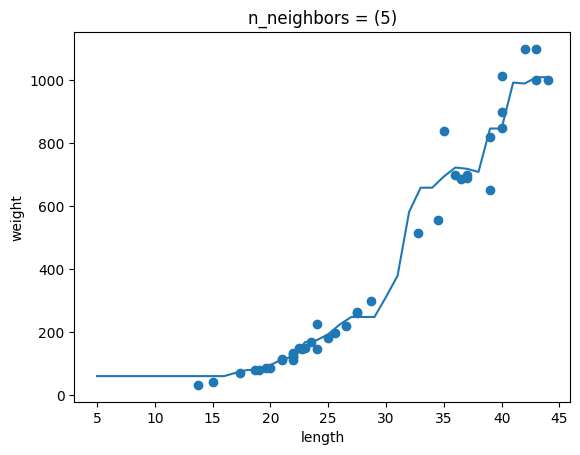

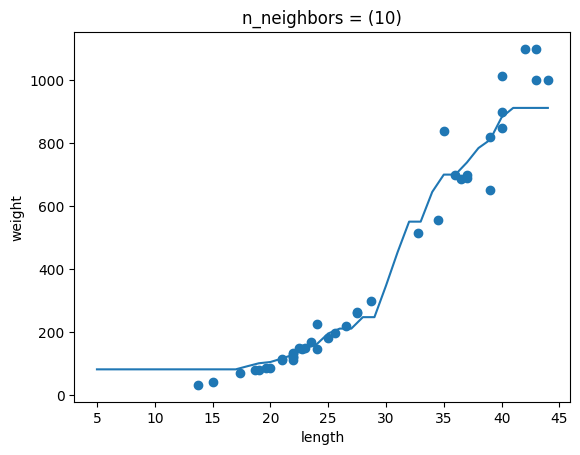

In [17]:
knr = KNeighborsRegressor()

x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)

  prediction = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title(f'n_neighbors = ({n})')
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()